Probability P(data|T):
    when given theta, what is the probability of something happens

Likelihood L(T|data):
    when given data, what is the likeli hood that theta can be used to describe this data

Using LLM to explain this:
Training: model modify the theta, so that the combination of all theta in the model can describe the data better, or the theta in the model can generate data follow the training data's distribution
Generating: model use the traned theta, calculate the probability of next token, so that it can generate long text

In [1]:
from scipy.stats import norm

# Define mean and standard deviation
mean = 32
std_dev = 2.5

# Calculate the probability of the range 32 to 34
# Pr(weight between 32 and 34 grams|mean = 32 and std = 2.5)
probability = norm.cdf(34, mean, std_dev) - norm.cdf(32, mean, std_dev)
f'{probability:.2f}'

'0.29'

In [2]:

# # Pr(weight > 34 grams|mean = 32 and std = 2.5)
probability = 1 - norm.cdf(34, mean, std_dev)
f'{probability:.2f}'

'0.21'

In [3]:

# L(mean=32 and std=2.5 | weight equals 34 grams)
likelihood = norm.pdf(34, mean, std_dev)
f'{likelihood:.2f}'

'0.12'

In [4]:
# L(mean=32 and std=2.5 | weight equals 34 grams)
likelihood = norm.pdf(34, 34, std_dev)
f'{likelihood:.2f}'

'0.16'

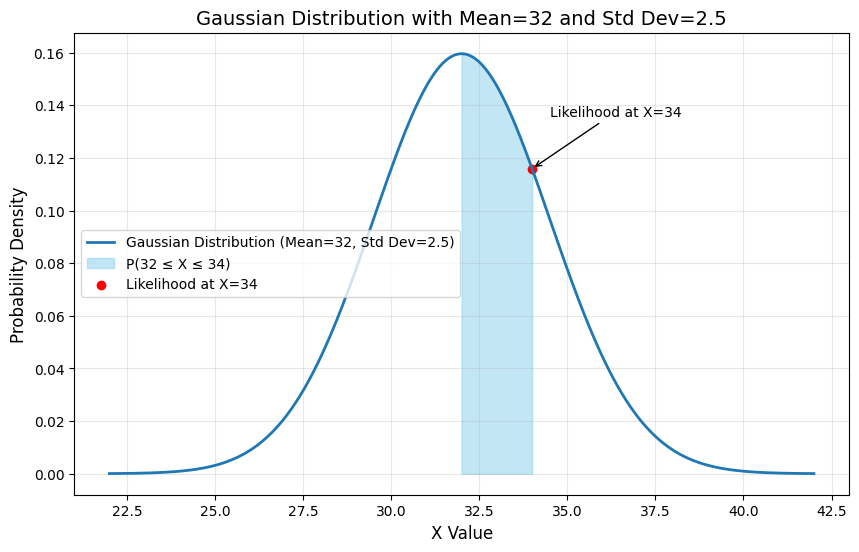

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for visualization
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 500)
y = norm.pdf(x, mean, std_dev)

# Plot the Gaussian curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Gaussian Distribution (Mean=32, Std Dev=2.5)", lw=2)

# Highlight the area for 24 to 32
x_fill = np.linspace(32, 34, 500)
y_fill = norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color="skyblue", alpha=0.5, label="P(32 ≤ X ≤ 34)")

# Mark the likelihood at x = 34
plt.scatter([34], [norm.pdf(34, mean, std_dev)], color="red", label="Likelihood at X=34")
plt.annotate(
    "Likelihood at X=34",
    xy=(34, norm.pdf(34, mean, std_dev)),
    xytext=(34.5, norm.pdf(34, mean, std_dev) + 0.02),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=10
)

# Add labels and legend
plt.title("Gaussian Distribution with Mean=32 and Std Dev=2.5", fontsize=14)
plt.xlabel("X Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

In [6]:
import numpy as np
from scipy.optimize import minimize


np.random.seed(0)
true_mu, true_sigma = 0, 0.1  
samples = np.random.normal(true_mu, true_sigma, 1000)

def log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(np.log(np.sqrt(2 * np.pi * sigma**2)) + ((data - mu)**2 / (2 * sigma**2)))

initial_params = [0, 1]  

result = minimize(lambda params: -log_likelihood(params, samples), initial_params, method='BFGS')

estimated_mu, estimated_sigma = result.x
result.x

array([-0.00452568,  0.09870331])

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [8]:
corpus = [
    "hello how are you",
    "i am fine thank you",
    "how about you",
    "i am doing well",
    "thank you very much"
]

In [15]:
world_list = " ".join(corpus).split()
vocab = list(set(world_list))
word2idx = {w: idx for idx, w in enumerate(vocab)}
idx2word = {idx: w for idx, w in enumerate(vocab)}
vocab_size = len(vocab)
vocab_size, word2idx

(13,
 {'doing': 0,
  'am': 1,
  'thank': 2,
  'i': 3,
  'are': 4,
  'you': 5,
  'much': 6,
  'hello': 7,
  'how': 8,
  'fine': 9,
  'very': 10,
  'well': 11,
  'about': 12})

In [18]:
def make_dataset(corpus):
    input_data = []
    target_data = []
    for sentence in corpus:
        words = sentence.split()
        for i in range(len(words)-1):
            input_data.append(word2idx[words[i]])
            target_data.append(word2idx[words[i+1]])
    return input_data, target_data

inputs, targets = make_dataset(corpus)
inputs, targets 

([7, 8, 4, 3, 1, 9, 2, 8, 12, 3, 1, 0, 2, 5, 10],
 [8, 4, 5, 1, 9, 2, 5, 12, 5, 1, 0, 11, 5, 10, 6])

In [19]:
inputs = torch.LongTensor(inputs)
targets = torch.LongTensor(targets)

In [23]:
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=10):
        super(LanguageModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, vocab_size)
    
    def forward(self, x):
        x = self.embed(x)  # [batch_size, embedding_dim]
        out = self.fc(x)   # [batch_size, vocab_size]
        return out

model = LanguageModel(vocab_size)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item(): 4f}")
        

Epoch [20/100], Loss:  0.193460
Epoch [40/100], Loss:  0.193256
Epoch [60/100], Loss:  0.193061
Epoch [80/100], Loss:  0.192874
Epoch [100/100], Loss:  0.192695
Epoch [120/100], Loss:  0.192523
Epoch [140/100], Loss:  0.192358
Epoch [160/100], Loss:  0.192200
Epoch [180/100], Loss:  0.192048
Epoch [200/100], Loss:  0.191902
Epoch [220/100], Loss:  0.191761
Epoch [240/100], Loss:  0.191625
Epoch [260/100], Loss:  0.191494
Epoch [280/100], Loss:  0.191368
Epoch [300/100], Loss:  0.191246
Epoch [320/100], Loss:  0.191129
Epoch [340/100], Loss:  0.191015
Epoch [360/100], Loss:  0.190905
Epoch [380/100], Loss:  0.190799
Epoch [400/100], Loss:  0.190696
Epoch [420/100], Loss:  0.190597
Epoch [440/100], Loss:  0.190500
Epoch [460/100], Loss:  0.190407
Epoch [480/100], Loss:  0.190316
Epoch [500/100], Loss:  0.190229
Epoch [520/100], Loss:  0.190143
Epoch [540/100], Loss:  0.190061
Epoch [560/100], Loss:  0.189980
Epoch [580/100], Loss:  0.189902
Epoch [600/100], Loss:  0.189826
Epoch [620/100

In [29]:
np.log(vocab_size)

np.float64(2.5649493574615367)

Text(0.5, 1.0, 'Training Loss over Epochs (Negative Log-Likelihood)')

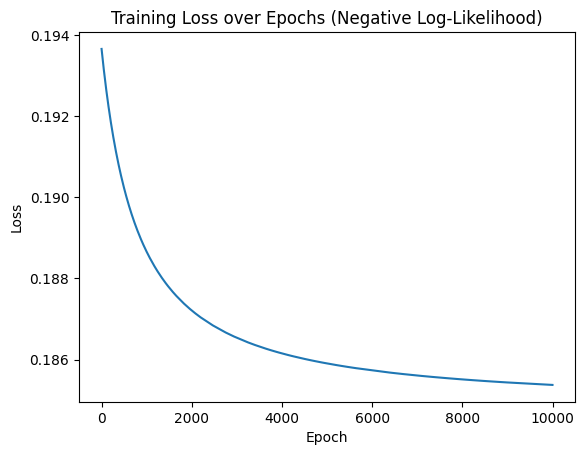

In [30]:
plt.plot(range(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs (Negative Log-Likelihood)")

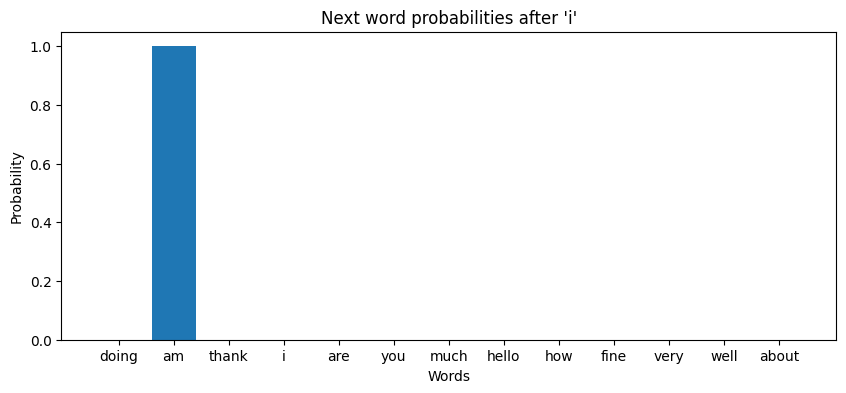

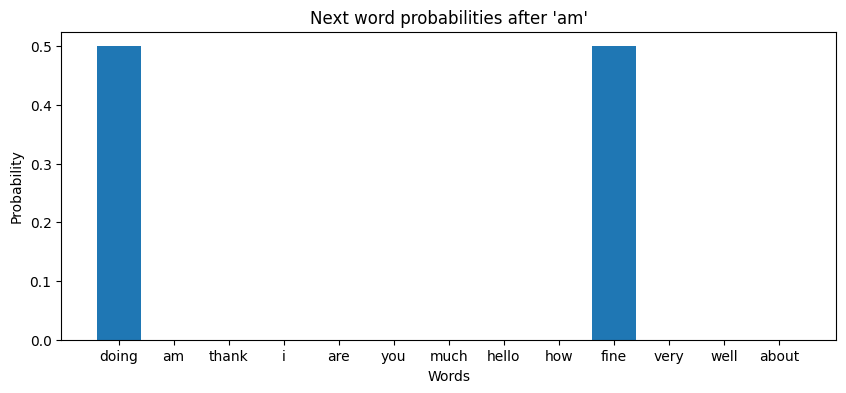

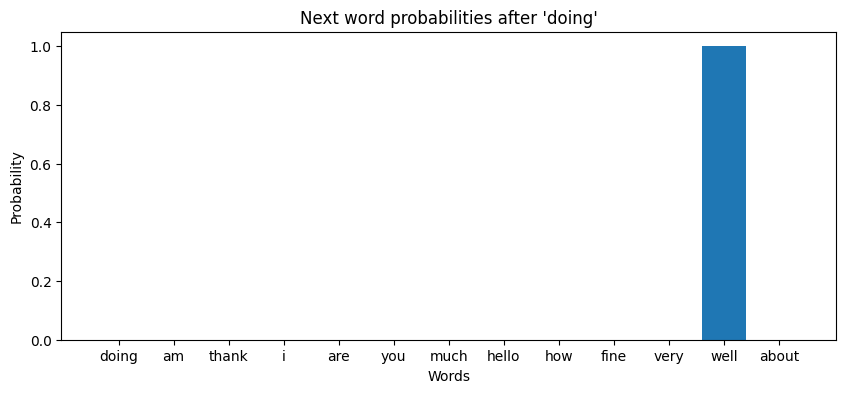

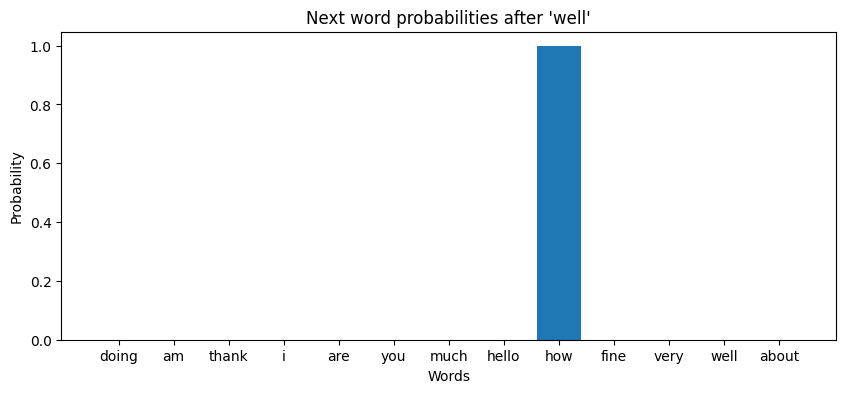

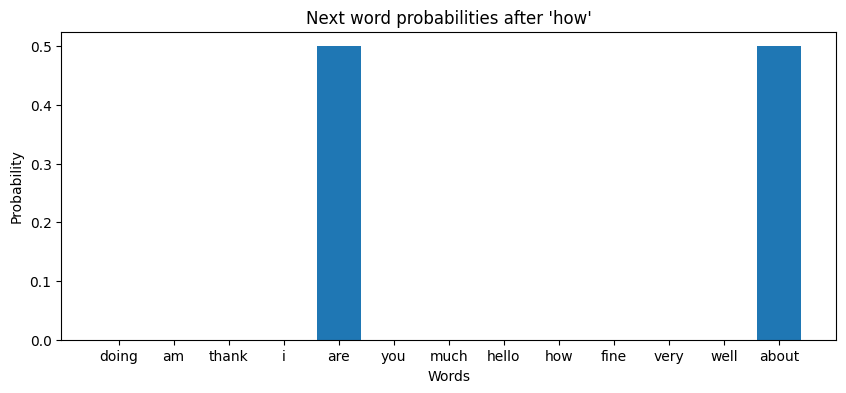

'i am doing well how about'

In [31]:
def generate_text(model, start_word, idx2word, word2idx, max_len=5):
    model.eval()
    words = [start_word]
    input_word = torch.LongTensor([word2idx[start_word]])
    with torch.no_grad():
        for _ in range(max_len):
            output = model(input_word)
            probabilities = torch.softmax(output, dim=1)
            probs = probabilities.squeeze().cpu().numpy()
            plt.figure(figsize=(10,4))
            plt.bar([idx2word[i] for i in range(vocab_size)], probs)
            plt.xlabel("Words")
            plt.ylabel("Probability")
            plt.title(f"Next word probabilities after '{words[-1]}'")
            plt.show()
            predicted_idx = torch.multinomial(probabilities, 1).item()
            predicted_word = idx2word[predicted_idx]
            words.append(predicted_word)
            input_word = torch.LongTensor([predicted_idx])
    return ' '.join(words)

start_word = 'i'
generated_sentence = generate_text(model, start_word, idx2word, word2idx)
generated_sentence